**Question 1**

The standard deviation measures the spread or variability of individual data points around the mean in the original dataset. It gives an idea of how much the values typically differ from the mean.

The standard error of the mean (SEM), on the other hand, represents how much the mean of a sample is expected to vary from the true population mean. SEM is derived from the standard deviation but is divided by the square root of the sample size, reflecting the precision of the sample

**Question 2**

To create a 95% confidence interval using the standard error of the mean (SEM), we assume the distribution of sample means is approximately normal. Multiply the SEM by 1.96 (the critical value for 95% confidence in a normal distribution) and add/subtract this product from the sample mean. This interval provides a range where we expect 95% of bootstrapped sample means to fall, capturing the uncertainty around the sample mean estimate.

**Question 3**

To create a 95% bootstrapped confidence interval using the bootstrapped means, you sort the bootstrapped sample means from lowest to highest. Then, find the values at the 2.5th percentile and the 97.5th percentile of this sorted list. These percentiles form the lower and upper bounds of the confidence interval, giving a range that covers the middle 95% of the bootstrapped sample means without relying on the standard deviation or SEM.

In [1]:
#Question 4

import numpy as np

# Example sample data (this can be any sample data you have)
sample_data = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize an array to store bootstrap means
bootstrap_means = []

# Bootstrap process
for i in range(n_bootstraps):
    # Resample data with replacement
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    
    # Calculate the mean of the bootstrap sample (change this line for other parameters)
    bootstrap_mean = np.mean(bootstrap_sample)
    
    # Store the result
    bootstrap_means.append(bootstrap_mean)

# Convert to numpy array for sorting
bootstrap_means = np.array(bootstrap_means)

# Calculate the 2.5th and 97.5th percentiles for a 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the 95% confidence interval for the mean
print(f"95% Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")


95% Confidence Interval for the Mean: [15.4, 22.6]


**Question 5**

We distinguish between the population parameter and the sample statistic because the population parameter is the true value we're trying to estimate (which we typically don't know), while the sample statistic is what we calculate from our data. Confidence intervals help us quantify how much uncertainty there is in using the sample statistic to estimate the population parameter. By understanding this distinction, we recognize that the confidence interval reflects the range within which the population parameter likely falls, based on the variability in the sample.

**Question 6**

What is the process of bootstrapping?
 - Bootstrapping is a way to estimate certain factors about a population when you only have one sample. This idea is to treat your sample like it is the entire population and then you randomly sample it with replacement (means that you can pick the same data point more than once) to create many new samples. After doing that, you can calculat whatever stat you are interested in, like mean, for each of these new samples that were created from the original sample. This just gives you a bunch of estimates to see how much the statistic might vary if you had different samples
 
What is the main purpose of bootstrapping?
 - The main purpose of bootstrapping is to estimate the uncertainty or variability around a statistic, like the mean or median, when you only have a single sample and don’t know what the whole population looks like. It helps you create confidence intervals and get a better sense of how reliable your sample statistic is, even when traditional methods (like assuming normality or knowing the population distribution) aren't possible.

How could you use bootstrapping to assess whether or not your hypothesized guess about the average of a population is plausible?
 - Let’s say you have a guess about what the average of the population is, but you only have a sample of size n. Using bootstrapping, you could randomly resample from your sample (with replacement) to generate lots of bootstrapped samples. Then, calculate the average for each bootstrapped sample. After that, check the range (confidence interval) of these averages. If your hypothesized guess falls inside this range, it's reasonable to think that your guess might be plausible. If it's far outside the range, your guess is likely off. It’s like using the data you have to see if the guess you made fits with the overall pattern of possible averages.

**Question 7**

A confidence interval overlapping zero "fails to reject the null hypothesis" because zero represents no effect or no difference in many hypothesis tests. If zero is included in the confidence interval, it suggests that there's a possibility that the true population parameter could be zero, meaning that the observed effect or difference might not be significant. In other words, you can't confidently say that the effect is different from zero.

On the other hand, if the confidence interval does not include zero, it suggests that the true population parameter is unlikely to be zero, and this provides enough evidence to "reject the null hypothesis." This means the observed effect or difference is statistically significant, implying the sample mean is not just due to random chance.

**Question 8**

Problem Introduction:
    
    The aim of the analysis is to determine if AliTech's new vaccine has had a positive effect on the health of the individuals who received it. The data contains both InitialHealthScore (before the vaccine) and FinalHealthScore (after the vaccine), and our goal is to assess whether there is a significant improvement.
    
Null Hypothesis:

    The null hypothesis for this analysis is that the vaccine has no effect, meaning there is no significant difference between the InitialHealthScore and FinalHealthScore. We will assess this by comparing the means of the initial and final health scores.

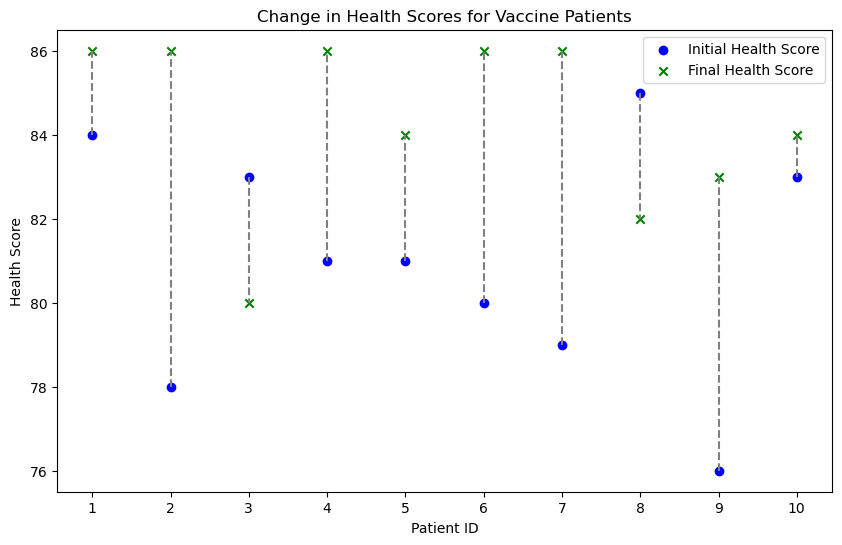

In [5]:
#Question 8 Cont.
#Data Visualization

# Re-load the vaccine data to ensure the DataFrame is available
vaccine_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Re-plot the visualization with the correct data
plt.figure(figsize=(10, 6))

# Plot lines between initial and final health scores for each patient
for i in range(len(vaccine_data)):
    plt.plot([vaccine_data['PatientID'][i], vaccine_data['PatientID'][i]], 
             [vaccine_data['InitialHealthScore'][i], vaccine_data['FinalHealthScore'][i]], 
             color='gray', linestyle='--')

# Scatter plot for initial and final scores
plt.scatter(vaccine_data['PatientID'], vaccine_data['InitialHealthScore'], label="Initial Health Score", color='blue', marker='o')
plt.scatter(vaccine_data['PatientID'], vaccine_data['FinalHealthScore'], label="Final Health Score", color='green', marker='x')

# Adding labels and title
plt.title("Change in Health Scores for Vaccine Patients")
plt.xlabel("Patient ID")
plt.ylabel("Health Score")
plt.xticks(vaccine_data['PatientID'])
plt.legend()

# Show plot
plt.show()


In [6]:
#Question 8. Cont
#Quantitative Data Analysis. Using Bootsrapping to create confidence intervals.

import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Calculate the observed difference between Final and Initial Health Scores
observed_diff = vaccine_data['FinalHealthScore'] - vaccine_data['InitialHealthScore']

# Bootstrapping function
def bootstrap_means(data, n_bootstrap=10000):
    bootstrapped_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))
    return np.array(bootstrapped_means)

# Perform bootstrapping on the observed differences
n_iterations = 10000
bootstrapped_diffs = bootstrap_means(observed_diff, n_iterations)

# Calculate 95% confidence interval
ci_lower = np.percentile(bootstrapped_diffs, 2.5)
ci_upper = np.percentile(bootstrapped_diffs, 97.5)

# Display the results
(ci_lower, ci_upper)


(0.9, 5.6)

**Question 8 Cont**

Methodology Code and Explanations:
    
    Using bootstrapping to create confidence intervals for the mean difference between the initial and final scores, We can quantitively analyze where the difference between these scores are statistcally significant.The 95% bootstrapped confidence interval for the mean difference between the Final Health Score and Initial Health Score is approximately (0.9, 5.6). Since this interval does not include zero, it suggests that the improvement in health scores is statistically significant.
    
Conclusion:

    We can reject the null hypothesis of no effect because the confidence interval does not overlap zero. This implies that the vaccine has had a positive impact on the health of the patients, as there is a significant difference between their initial and final health scores. For further considerations, we can focus on larger sample size since more patients would strengthen the analysis, comparing with a control group would clarify if the improvement is due to the vaccine or other factors, and a subgroup analysis will investigate if the vaccine's effect differs by age or gender for more insights and examinations.

**Question 9**

OF COURSE!